In [2]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import scipy
from scipy import stats
from scipy.stats import binom, poisson, norm, t
import os

import seaborn as sns
import pylab
from pylab import legend, plot, title, xlabel, ylabel

In [3]:
os.getcwd()

'C:\\Users\\dell'

In [4]:
os.chdir(r"C:\\Users\\dell\\Downloads")

In [5]:
os.getcwd()

'C:\\Users\\dell\\Downloads'

# Uploading of Datasets

### 1] Application Data

In [6]:
df = pd.read_csv("C:\\Users\\dell\\Downloads\\application_data.csv")

In [7]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 2] Previous Application Dataset

In [8]:
df_prev = pd.read_csv("C:\\Users\\dell\\Downloads\\previous_application.csv")

In [9]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [11]:
# Shows number of rows and columns
df.shape

(307511, 122)

In [12]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [13]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [14]:
df_prev.shape

(1670214, 37)

In [15]:
# Check the null values in each column
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

#### Check the percentage of null values in each column

In [16]:
df_percent = round((100*df.isnull().sum()/len(df)),2)

In [17]:
df_percent

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [18]:
df_null = df.isnull().mean()

In [19]:
df_null

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

#### Check the columns where percentage of null values greater than 19%

In [20]:
drop_col = df_percent[df_percent > 19].index

In [21]:
drop_col

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMEN

In [22]:
len(drop_col)

51

#### Delete the columns where percentage of null values greater than 19%

In [23]:
df_app_clean = df.drop(columns = drop_col)

In [24]:
len(df_percent[df_percent > 19])

51

In [25]:
df_app_clean

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
len(df_app_clean)

307511

In [27]:
len(df_app_clean.columns)

71

In [28]:
df_app_clean['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

## Cleaned Application Dataset

In [29]:
df_app_clean.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

# Cleaning of Previous Application Dataset

#### Find the percentage of null values in each column

In [30]:
df_prev_percent = round((100*df_prev.isnull().sum()/len(df_prev)),2)

In [31]:
df_prev_percent

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

#### Check the columns where percentage of null values > 20

In [32]:
drop_prev_col = df_prev_percent[df_prev_percent > 20].index

In [33]:
len(drop_prev_col)

14

In [34]:
len(df_prev.columns)

37

#### Drop the columns where percentage of null values > 20

In [37]:
df_prev_clean = df_prev.drop(columns=drop_prev_col)

In [38]:
len(df_prev_clean.columns)

23

## Cleaned Previous Application Dataset

In [39]:
df_prev_clean.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

### Fill the Null Values with other values in application dataset

#### Group by Name_Type_Suite column of application dataset

In [40]:
df_app_clean.groupby('NAME_TYPE_SUITE').count()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
NAME_TYPE_SUITE,,,,,,,,,,,,,,,,,,,,,
Children,3267,3267,3267,3267,3267,3267,3267,3267,3267,3267,...,3267,3267,3267,3267,2780,2780,2780,2780,2780,2780
Family,40149,40149,40149,40149,40149,40149,40149,40149,40149,40148,...,40149,40149,40149,40149,34424,34424,34424,34424,34424,34424
Group of people,271,271,271,271,271,271,271,271,271,271,...,271,271,271,271,226,226,226,226,226,226
Other_A,866,866,866,866,866,866,866,866,866,866,...,866,866,866,866,710,710,710,710,710,710
Other_B,1770,1770,1770,1770,1770,1770,1770,1770,1770,1770,...,1770,1770,1770,1770,1468,1468,1468,1468,1468,1468
"Spouse, partner",11370,11370,11370,11370,11370,11370,11370,11370,11370,11370,...,11370,11370,11370,11370,9619,9619,9619,9619,9619,9619
Unaccompanied,248526,248526,248526,248526,248526,248526,248526,248526,248526,248515,...,248526,248526,248526,248526,215582,215582,215582,215582,215582,215582


#### Find the mode of Name_Type_Suit column

In [41]:
df_app_clean['NAME_TYPE_SUITE'].mode()    

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [42]:
df_app_clean['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [45]:
df_app_clean['NAME_TYPE_SUITE'].fillna(value = 'Unaccompanied' , inplace=False)

0         Unaccompanied
1                Family
2         Unaccompanied
3         Unaccompanied
4         Unaccompanied
              ...      
307506    Unaccompanied
307507    Unaccompanied
307508    Unaccompanied
307509    Unaccompanied
307510    Unaccompanied
Name: NAME_TYPE_SUITE, Length: 307511, dtype: object

In [46]:
df_app_clean['NAME_TYPE_SUITE']

0         Unaccompanied
1                Family
2         Unaccompanied
3         Unaccompanied
4         Unaccompanied
              ...      
307506    Unaccompanied
307507    Unaccompanied
307508    Unaccompanied
307509    Unaccompanied
307510    Unaccompanied
Name: NAME_TYPE_SUITE, Length: 307511, dtype: object

In [47]:
df_app_clean.AMT_REQ_CREDIT_BUREAU_HOUR.mean()

0.006402448193930645

#### Fill Null Values By 0

In [48]:
df_app_clean['AMT_REQ_CREDIT_BUREAU_HOUR']=df_app_clean['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0)

In [49]:
df_app_clean['AMT_REQ_CREDIT_BUREAU_DAY']=df_app_clean['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0)

In [50]:
df_app_clean['AMT_REQ_CREDIT_BUREAU_WEEK']=df_app_clean['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0)

In [51]:
df_app_clean['AMT_REQ_CREDIT_BUREAU_MON']=df_app_clean['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0)

In [52]:
df_app_clean['AMT_REQ_CREDIT_BUREAU_YEAR']=df_app_clean['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

Fill null values by finding mean of that column

In [53]:
df_app_clean['AMT_GOODS_PRICE'] = df_app_clean['AMT_GOODS_PRICE'].fillna(df_app_clean['AMT_GOODS_PRICE'].mean())

In [54]:
df_app_clean['AMT_ANNUITY'].median()

24903.0

#### Fill null values by finding median of that column

In [55]:
df_app_clean['AMT_ANNUITY'] = df_app_clean['AMT_ANNUITY'].fillna(df_app_clean['AMT_ANNUITY'].median())

In [56]:
df_app_clean['AMT_ANNUITY'].isnull().sum()

0

In [57]:
df_app_clean['AMT_REQ_CREDIT_BUREAU_QRT'] = df_app_clean['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0)

In [58]:
round((100*df_app_clean.isnull().sum()/len(df_app_clean)),2)

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 71, dtype: float64

In [59]:
df_app_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Data Cleaning Of Previous Application Dataset

#### Check the null values

In [60]:
df_prev_clean.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_APPLICATION                  0
AMT_CREDIT                       1
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [61]:
unwanted = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
           'REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
           'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [62]:
len(unwanted)

29

### Drop the columns which are unnecesarry

In [63]:
df_app_clean = df_app_clean.drop(columns=unwanted)

In [64]:
len(df_app_clean.columns)

42

#### Check the count of Males and Females

In [65]:
df_app_clean.groupby('CODE_GENDER').count()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CODE_GENDER,,,,,,,,,,,,,,,,,,,,,
F,202448,202448,202448,202448,202448,202448,202448,202448,202448,202448,...,201793,201793,201793,202448,202448,202448,202448,202448,202448,202448
M,105059,105059,105059,105059,105059,105059,105059,105059,105059,105059,...,104693,104693,104693,105058,105059,105059,105059,105059,105059,105059
XNA,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


#### Replace the null vaules by F i.e Female

In [66]:
df_app_clean.replace(to_replace='XNA', value='F', inplace=True)

In [67]:
df_app_clean.groupby('CODE_GENDER').count()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CODE_GENDER,,,,,,,,,,,,,,,,,,,,,
F,202452,202452,202452,202452,202452,202452,202452,202452,202452,202452,...,201797,201797,201797,202452,202452,202452,202452,202452,202452,202452
M,105059,105059,105059,105059,105059,105059,105059,105059,105059,105059,...,104693,104693,104693,105058,105059,105059,105059,105059,105059,105059


In [65]:
df_app_clean.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
F                         55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### Drop the rows where Organization type = NUll

In [68]:
drop_val = df_app_clean[df_app_clean['ORGANIZATION_TYPE']=='F'].index

In [69]:
df_app_clean = df_app_clean.drop(drop_val)

In [70]:
df_app_clean.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

## Create bins for AMT_INCOME_TOTAL and AMT_CREDIT

#### For AMT_INCOME_TOTAL

In [74]:
bins_income = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000, 325000, 350000, 375000,
               400000, 425000, 450000, 475000, 500000]

slot_income = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000-125000', '125000-150000', '150000-175000', '175000-200000',
               '200000-225000', '225000-250000', '250000-275000', '275000-300000', '300000-325000', '325000-350000', '350000-375000',
               '375000-400000', '400000-425000', '425000-450000', '450000-475000', '475000-500000']

In [75]:
df_app_clean['AMT_INCOME_RANGE'] = pd.cut(df_app_clean['AMT_INCOME_TOTAL'],bins_income, labels=slot_income)

#### For AMT_CREDIT

In [76]:
bins_credit =[0,150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 
650000, 700000, 750000, 800000, 850000, 900000]

slots_credit =['0-150000','150000-200000', '200000-250000', '250000-300000', '300000-350000',
               '350000-400000', '400000-450000', '450000-500000', '500000-550000', '550000-600000',
               '600000-650000', '650000-700000', '700000-750000', '750000-800000', '800000-850000', '850000-900000']

In [77]:
df_app_clean['AMT_CREDIT_RANGE'] = pd.cut(df_app_clean['AMT_CREDIT'],bins_credit, labels=slots_credit)    

### Take Target Count

In [78]:
target_counts = df_app_clean.TARGET.value_counts()

In [79]:
target_counts

0    230302
1     21835
Name: TARGET, dtype: int64

Target=0 means the people those who are non-defaulters

Target=1 means the people those who are defaulters

In [83]:
x = [0, 1]
y = [target_counts.get(0, 0), target_counts.get(1, 0)]  # Ensure both 0 and 1 have counts

Text(0.5, 1.0, 'Target 0 and 1')

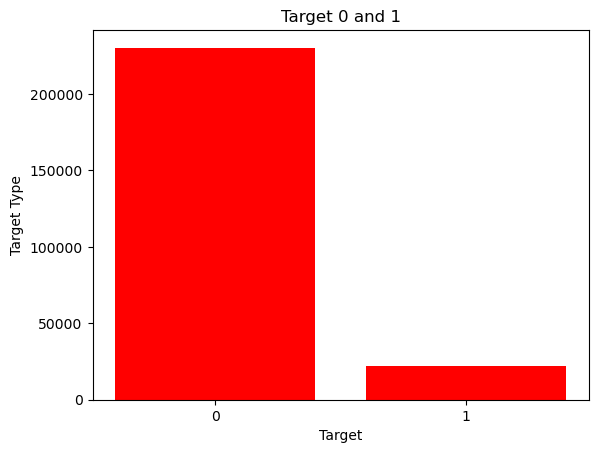

In [85]:
# Plot the bar plot
plt.bar(x, y, color='red')
plt.xticks([0, 1])  # Set x-axis ticks to only 0 and 1
plt.xlabel('Target')
plt.ylabel('Target Type')
plt.title('Target 0 and 1')

Non-defaulter people has significantly higher observations compared to defaulter people.

This dataset 'TARGET' column is imbalanced. 


### Imbalance ratio for Target column

In [87]:
target0 = df_app_clean.loc[df_app_clean['TARGET'] == 0]
target1 = df_app_clean.loc[df_app_clean['TARGET'] == 1]

In [88]:
target_ratio = round((len(target0)/len(target1)), 2)
target_ratio

10.55

# Analysis

### Univariate analysis with respect to target variable

### Gender Distribution

Text(0.5, 1.0, 'target0 Gender Distribution')

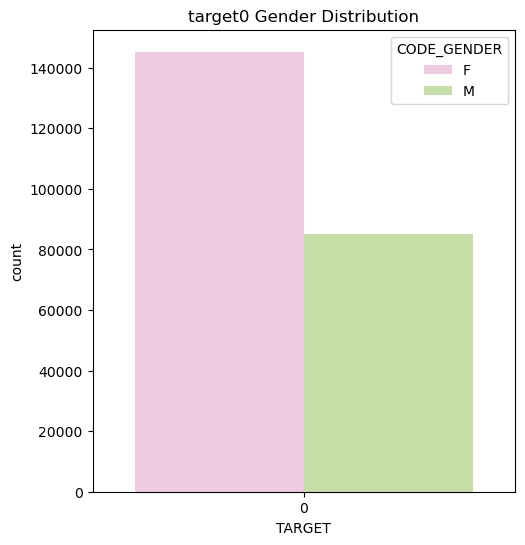

In [88]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x='TARGET', hue='CODE_GENDER', data=target0, palette = 'PiYG', dodge = True)
plt.title('target0 Gender Distribution')

Target0 shows a dominance of females compared to males, indicating a gender imbalance risk. 

Text(0.5, 1.0, 'Target1 Gender Distribution')

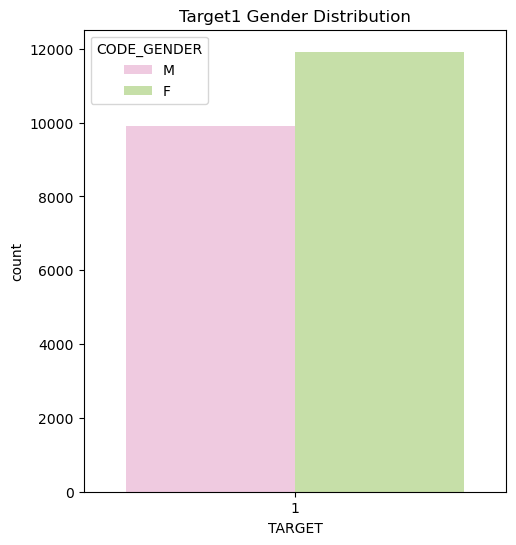

In [90]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot(x='TARGET', hue='CODE_GENDER', data=target1, palette = 'PiYG', dodge = True)
plt.title('Target1 Gender Distribution')

Target1 has a more balanced gender distribution, reducing potential gender bias. 

### People Who having Difficulty in repaying the Loan

In [92]:
# Total counts for each gender
total_gender_counts = df_app_clean['CODE_GENDER'].value_counts()

In [93]:
# Default counts by gender
default_gender_counts = target1['CODE_GENDER'].value_counts()

In [94]:
default_rate = (default_gender_counts / total_gender_counts) * 100

In [95]:
default_rate

F     7.584250
M    10.440625
Name: CODE_GENDER, dtype: float64

Text(0, 0.5, 'Gender Count')

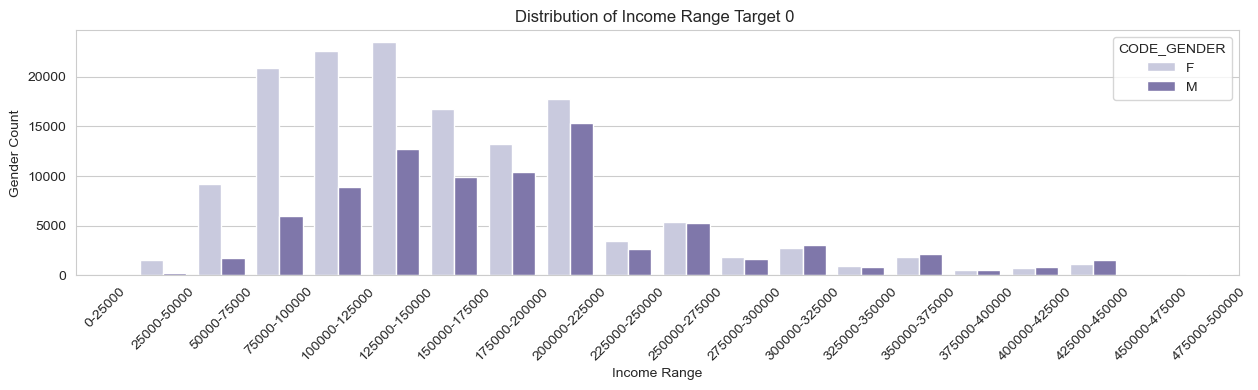

In [102]:
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')

plt.subplot(212)
sns.countplot(data=target0, x = 'AMT_INCOME_RANGE', hue = 'CODE_GENDER', palette = 'Purples')
plt.xticks(rotation=90)
plt.title('Distribution of Income Range Target 0 ')
plt.xlabel('Income Range')
plt.xticks(rotation = 45)
plt.ylabel('Gender Count')
#plt.yscale('log')

Text(0, 0.5, 'Gender Count')

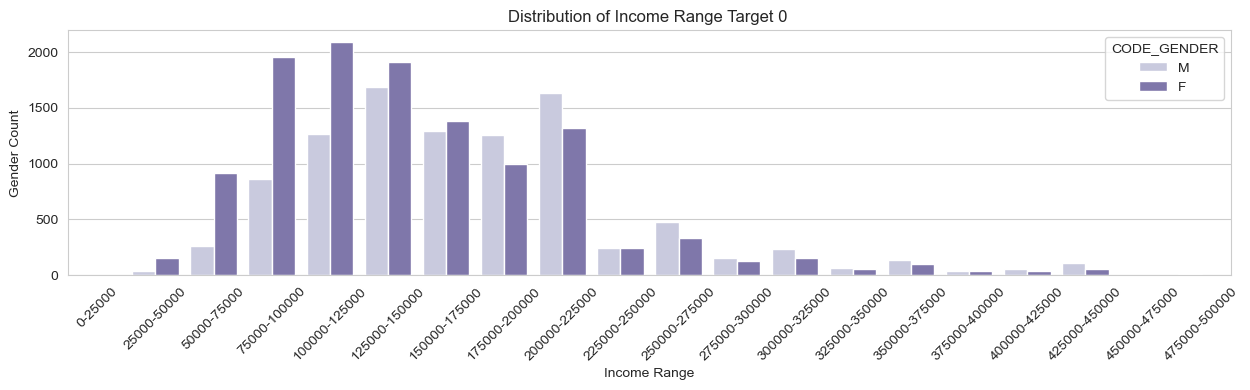

In [104]:
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')

plt.subplot(212)
sns.countplot(data=target1, x = 'AMT_INCOME_RANGE', hue = 'CODE_GENDER', palette = 'Purples')
plt.xticks(rotation=90)
plt.title('Distribution of Income Range Target 0 ')
plt.xlabel('Income Range')
plt.xticks(rotation = 45)
plt.ylabel('Gender Count')
#plt.yscale('log')


 It is seen that there are more female between 100000 to 125000 income range. 

### Income Types across Gender

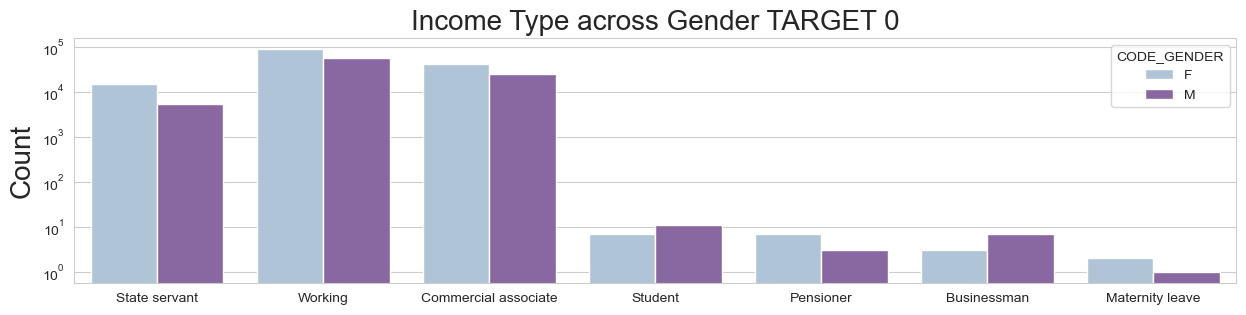

In [93]:
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')

plt.subplot(211)
sns.countplot(data = target0, x = 'NAME_INCOME_TYPE', hue = 'CODE_GENDER', palette = 'BuPu')
plt.xticks(rotation = 45)
plt.title('Income Type across Gender TARGET 0', fontsize = 20)
plt.xlabel('Income Type', fontsize = 20).set_visible(False)
plt.xticks(rotation = 0)
plt.ylabel('Count', fontsize = 20)
plt.yscale('log')

In [ ]:
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')

plt.subplot(212)
sns.countplot(data = target1, x = 'NAME_INCOME_TYPE', hue = 'CODE_GENDER', palette = 'BuPu')
plt.xticks(rotation = 45)
plt.title('Income Type across Gender TARGET 1', fontsize = 20)
plt.xlabel('Income Type', fontsize = 20)
plt.xticks(rotation = 45)
plt.ylabel('Count', fontsize = 20)
plt.yscale('log')

### Contract Type across Gender

Text(0, 0.5, 'Count')

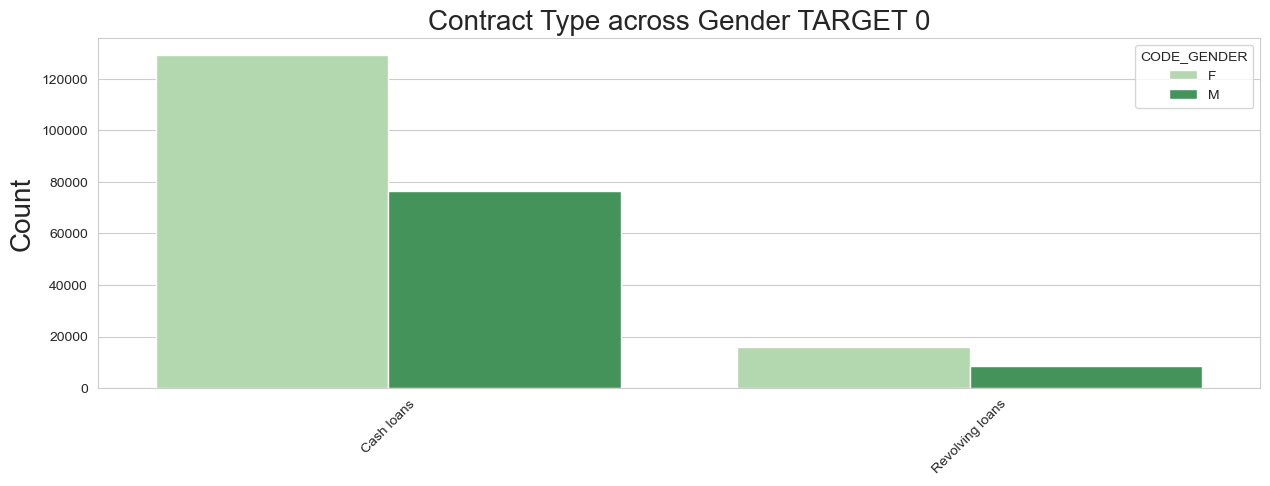

In [108]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')

plt.subplot(211)
sns.countplot(data = target0, x = 'NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', palette = 'Greens')
plt.xticks(rotation = 45)
plt.title('Contract Type across Gender TARGET 0', fontsize = 20)
plt.xlabel('Contract Type', fontsize = 20).set_visible(False)
plt.ylabel('Count', fontsize = 20)
#plt.yscale('log')

Text(0, 0.5, 'Count')

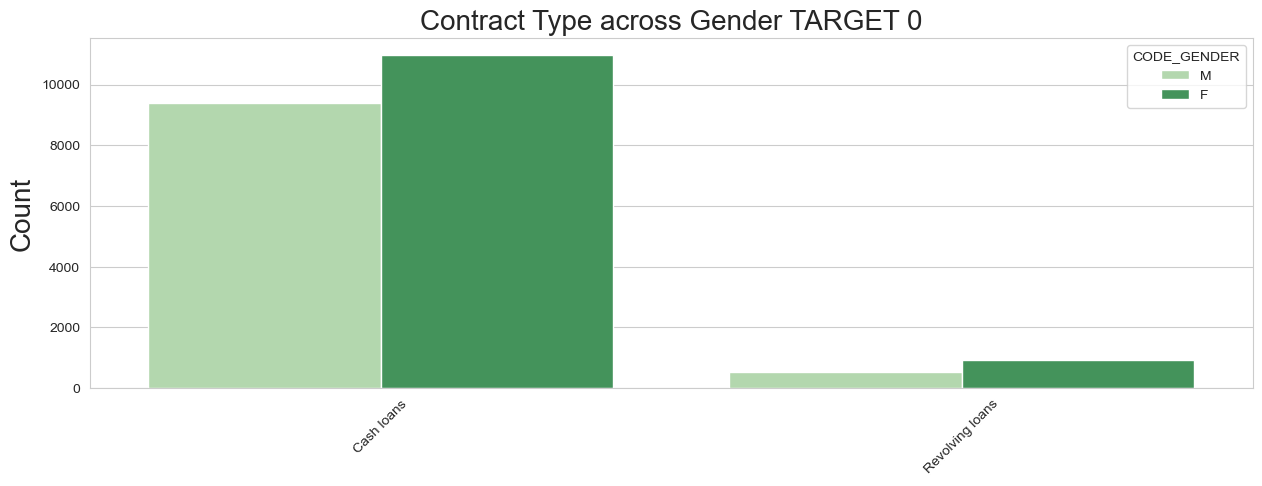

In [107]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')

plt.subplot(211)
sns.countplot(data = target1, x = 'NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', palette = 'Greens')
plt.xticks(rotation = 45)
plt.title('Contract Type across Gender TARGET 0', fontsize = 20)
plt.xlabel('Contract Type', fontsize = 20).set_visible(False)
plt.ylabel('Count', fontsize = 20)
#plt.yscale('log')

# Bivariate Analysis

### Plotting scatterplot to find any correlations and to check the trends in the dataset, in logs


Text(0, 0.5, 'Income')

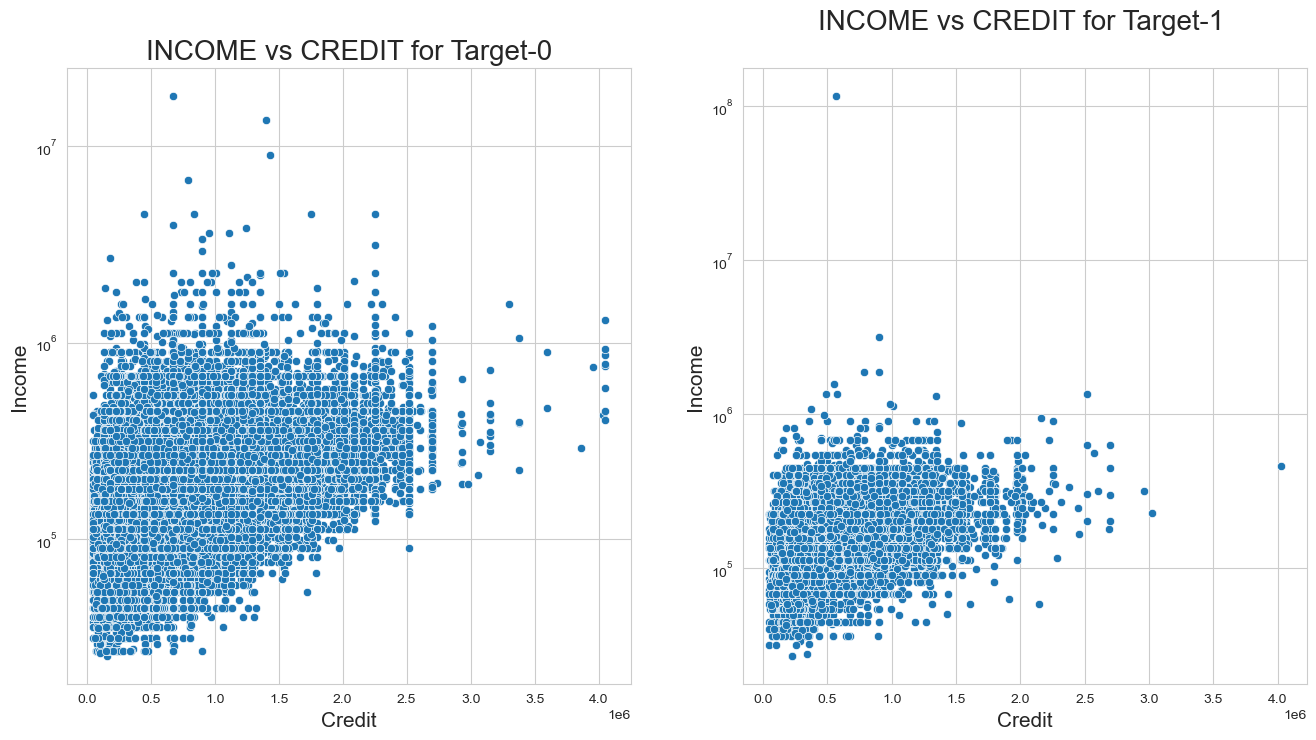

In [109]:
plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.scatterplot(data = target0, x = target0.AMT_CREDIT, y = target0.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target-0', fontsize=20)
plt.yscale('log')
plt.xlabel('Credit', fontsize=15)
plt.ylabel('Income', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(data = target1, x = target1.AMT_CREDIT, y = target1.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target-1 \n', fontsize=20)
plt.yscale('log')
plt.xlabel('Credit', fontsize=15)
plt.ylabel('Income', fontsize=15)


# Find Outliers

### Distribution of income amount

Text(0.5, 1.0, 'Distribution of Income Amount \n')

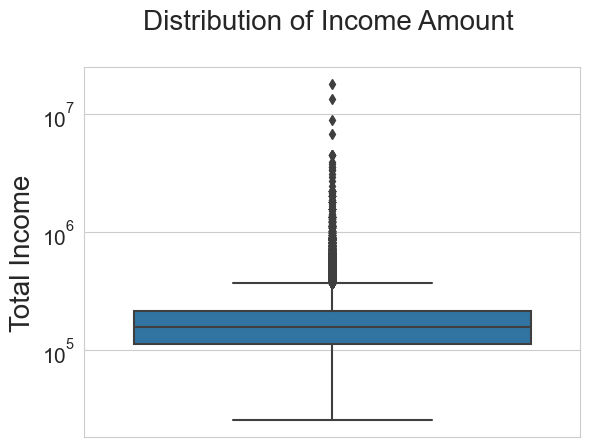

In [113]:
sns.set_style('whitegrid')

sns.boxplot(data=target0, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Income', fontsize=20)
plt.title('Distribution of Income Amount \n', fontsize=20)

Equal distribution of the Income amount of the clients is to be found.

Outliers are also present


### Distribution of Annuity Amount

Text(0.5, 1.0, 'Distribution of Annuity Amount \n')

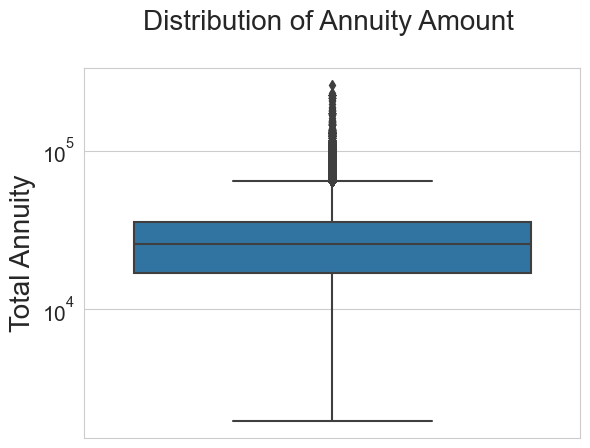

In [114]:
sns.set_style('whitegrid')

sns.boxplot(data=target0, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Annuity', fontsize=20)
plt.title('Distribution of Annuity Amount \n', fontsize=20)

The first quartile is bigger than the third quartile.

### Distribution of Income Amount

In [ ]:
sns.set_style('whitegrid')

sns.boxplot(data=target1, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Income', fontsize=20)
plt.title('Distribution of Income Amount \n', fontsize=20)

Most of the income of the client lies in the third quartile.

# Multivariate Analysis

### For Target 0

Text(0.5, 1.0, 'Income amount vs Education Status (TARGET=0) \n')

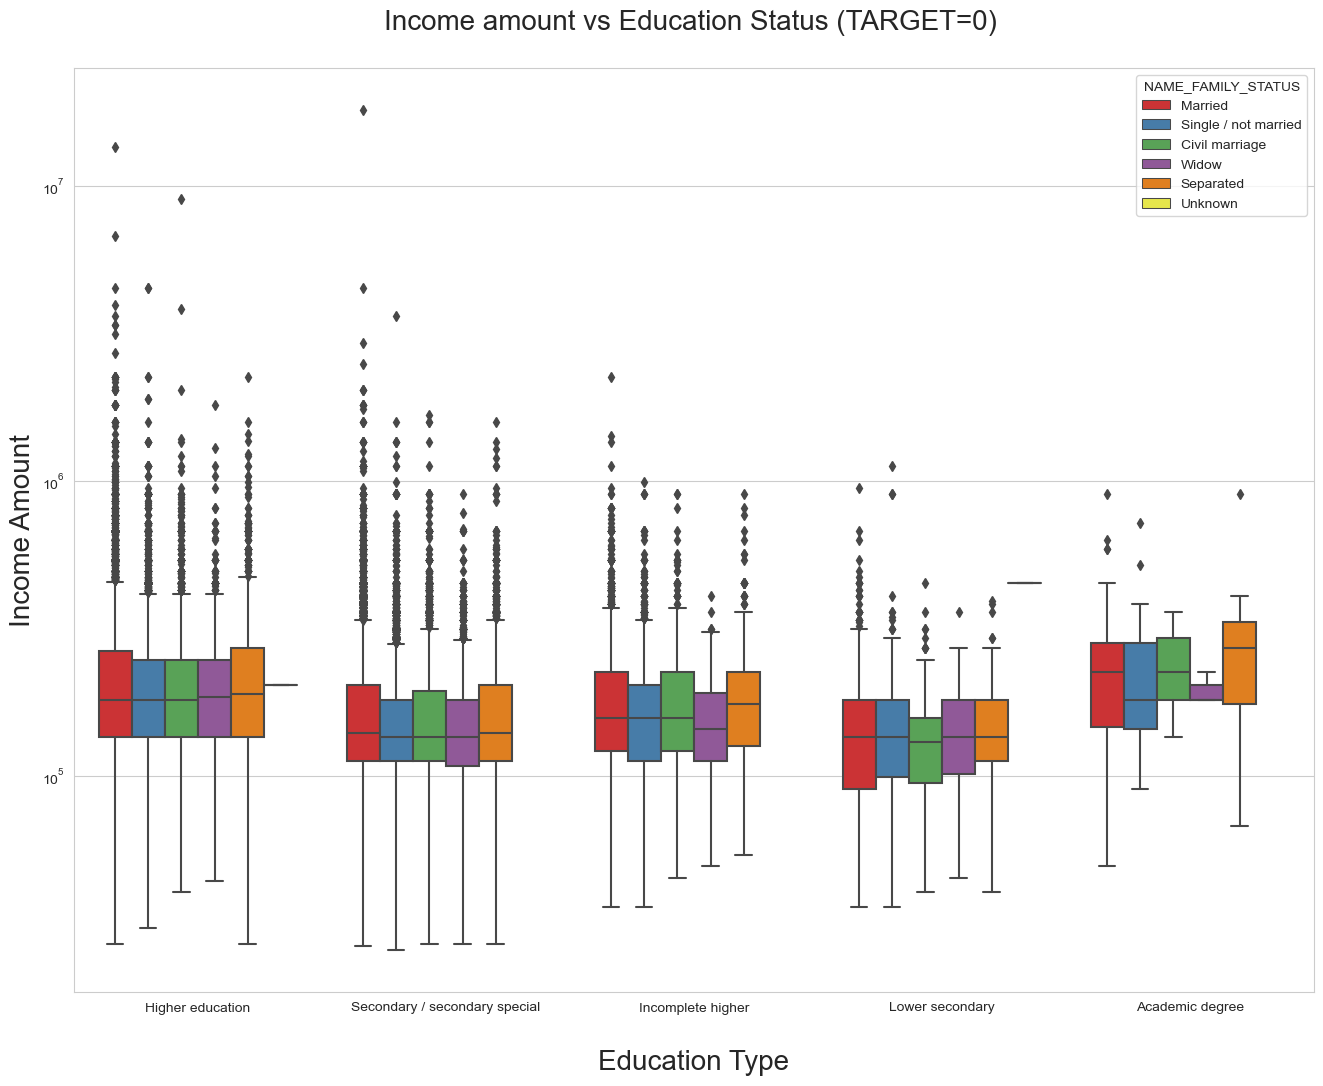

In [117]:
plt.figure(figsize=[16,12])

sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Income Amount', fontsize=20)
plt.yscale('log')
plt.title('Income amount vs Education Status (TARGET=0) \n', fontsize=20)

Text(0.5, 1.0, 'Credit amount vs Education Status (TARGET=1) \n')

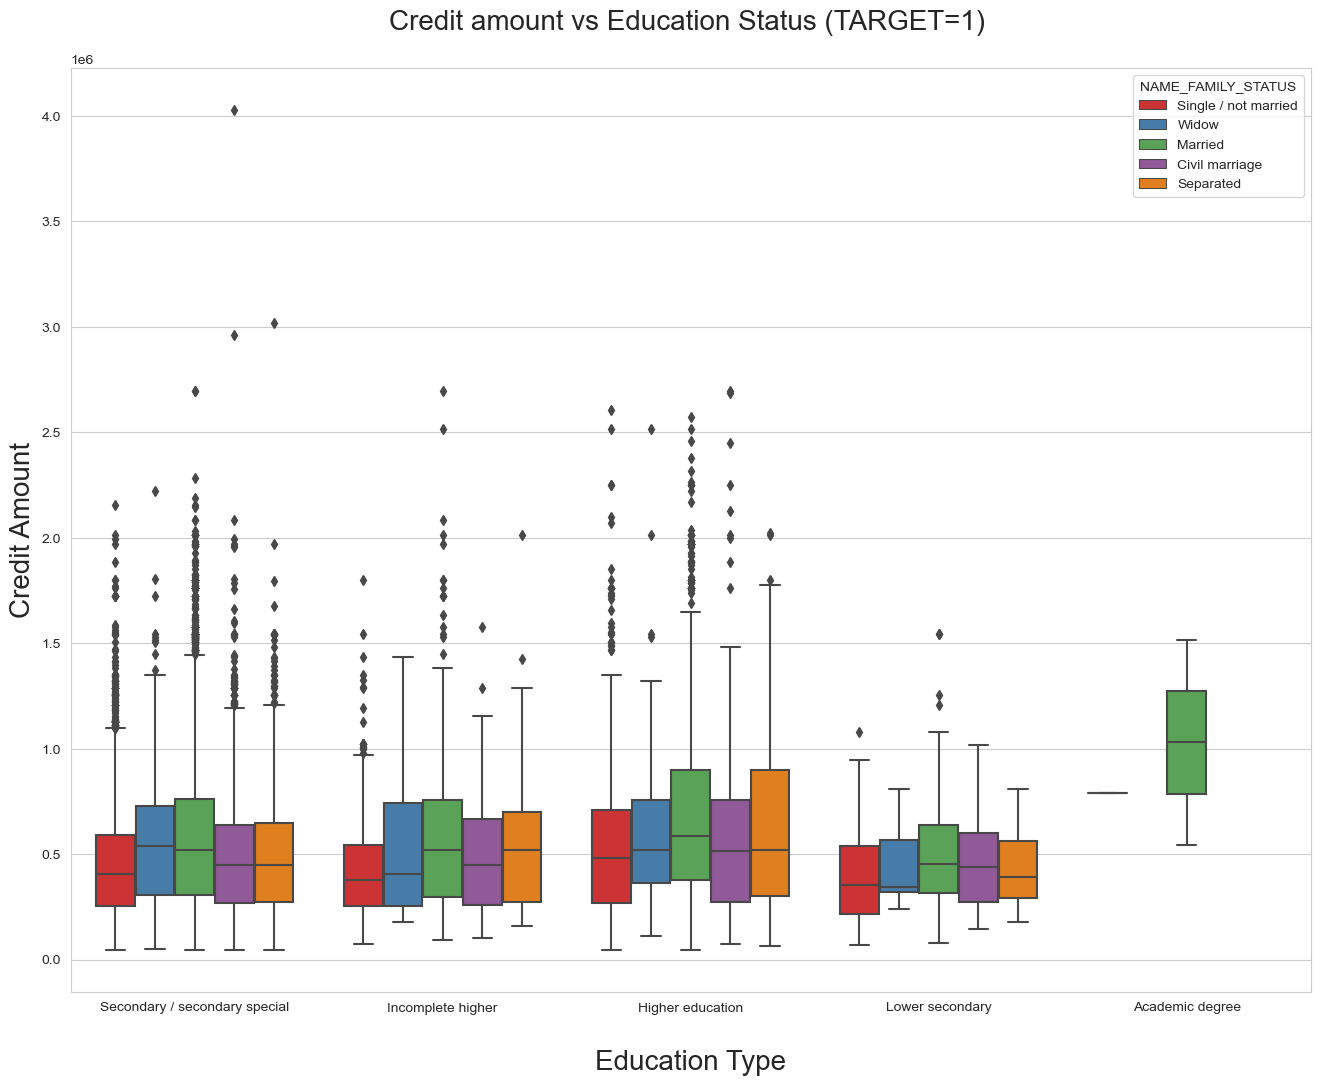

In [95]:
plt.figure(figsize=[16,12])

sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS', orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit amount vs Education Status (TARGET=1) \n', fontsize=20)

In [97]:
# Merging of the two datasets,

loan_merg = pd.merge(left = df_app_clean, right = df_prev_clean, how = 'inner', on = 'SK_ID_CURR')
loan_merg.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,middle,POS mobile without interest


In [98]:
loan_merg = loan_merg.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [99]:
# Removing the unwanted columns from the dataset for the ease of analysis

loan_merg.drop(['SK_ID_CURR','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

### Univariate Analysis

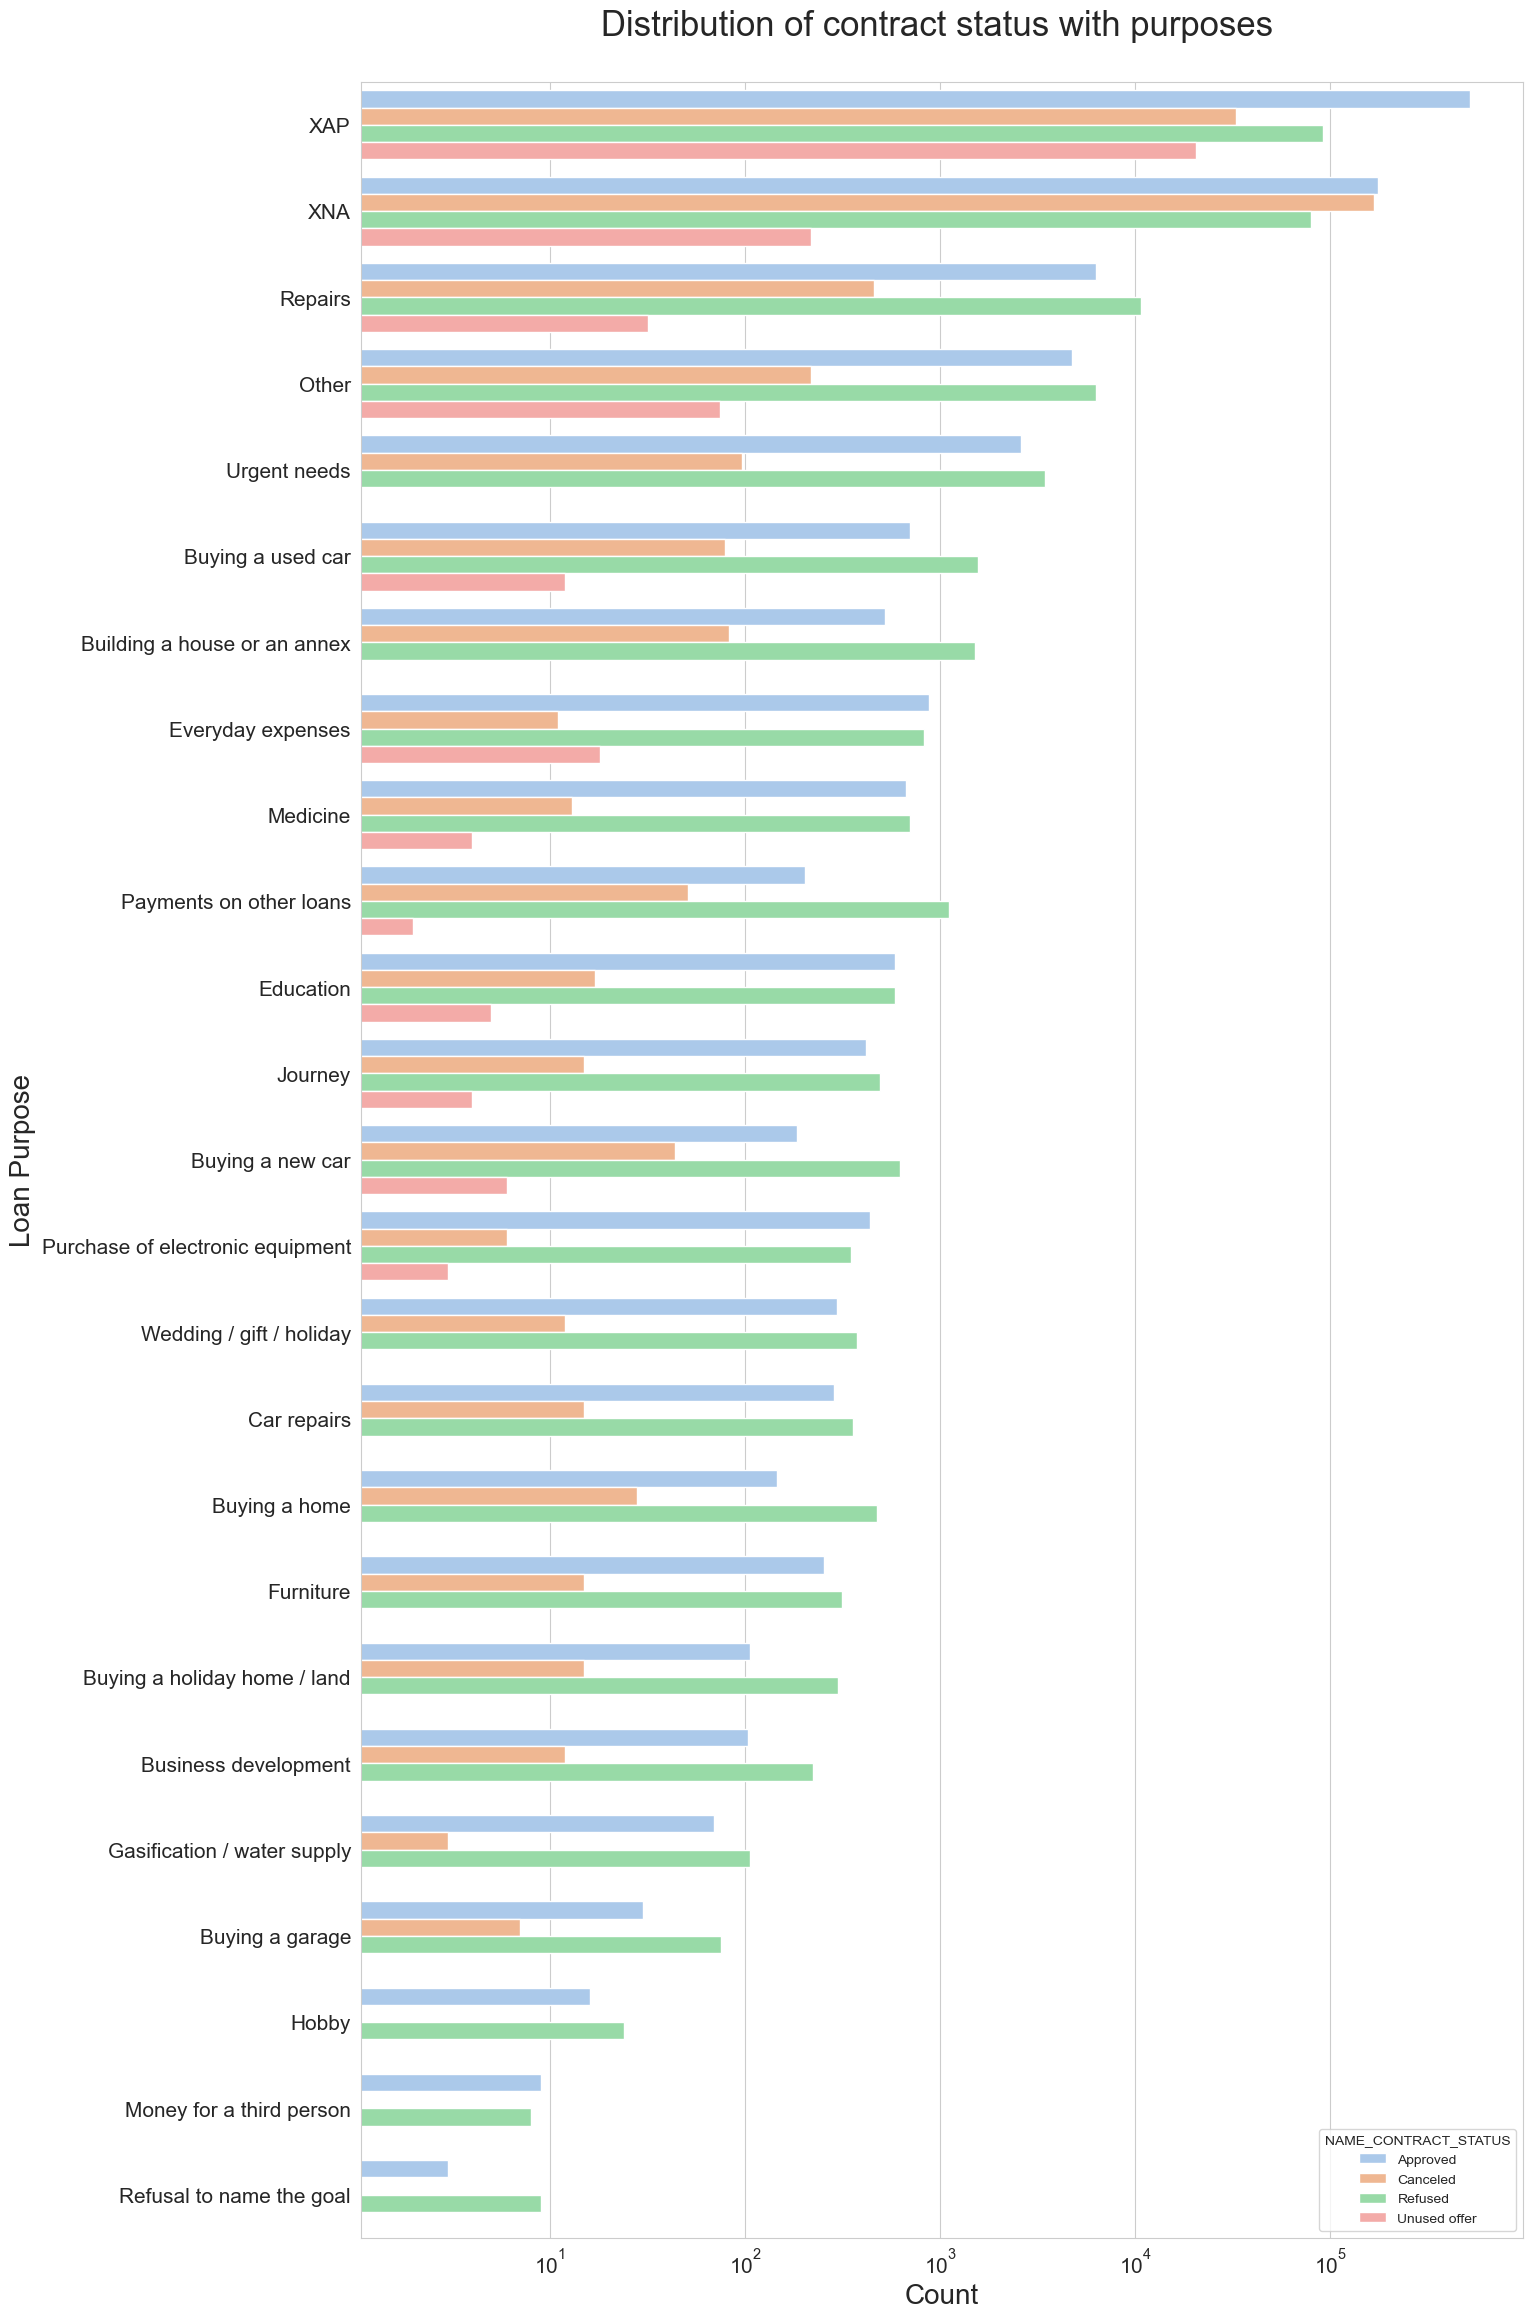

In [101]:
# Plotting for the Contract Status,

plt.figure(figsize=[15,28])

sns.countplot(data = loan_merg, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=loan_merg['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='pastel')

plt.title('Distribution of contract status with purposes \n', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xscale('log')


C:\Users\dell\AppData\Local\Temp\ipykernel_20700\1590977022.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data =loan_merg, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE', palette='bright', ci = None)


(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]),
 [Text(0, 0.0, '0'),
  Text(0, 100000.0, '100000'),
  Text(0, 200000.0, '200000'),
  Text(0, 300000.0, '300000'),
  Text(0, 400000.0, '400000'),
  Text(0, 500000.0, '500000'),
  Text(0, 600000.0, '600000'),
  Text(0, 700000.0, '700000')])

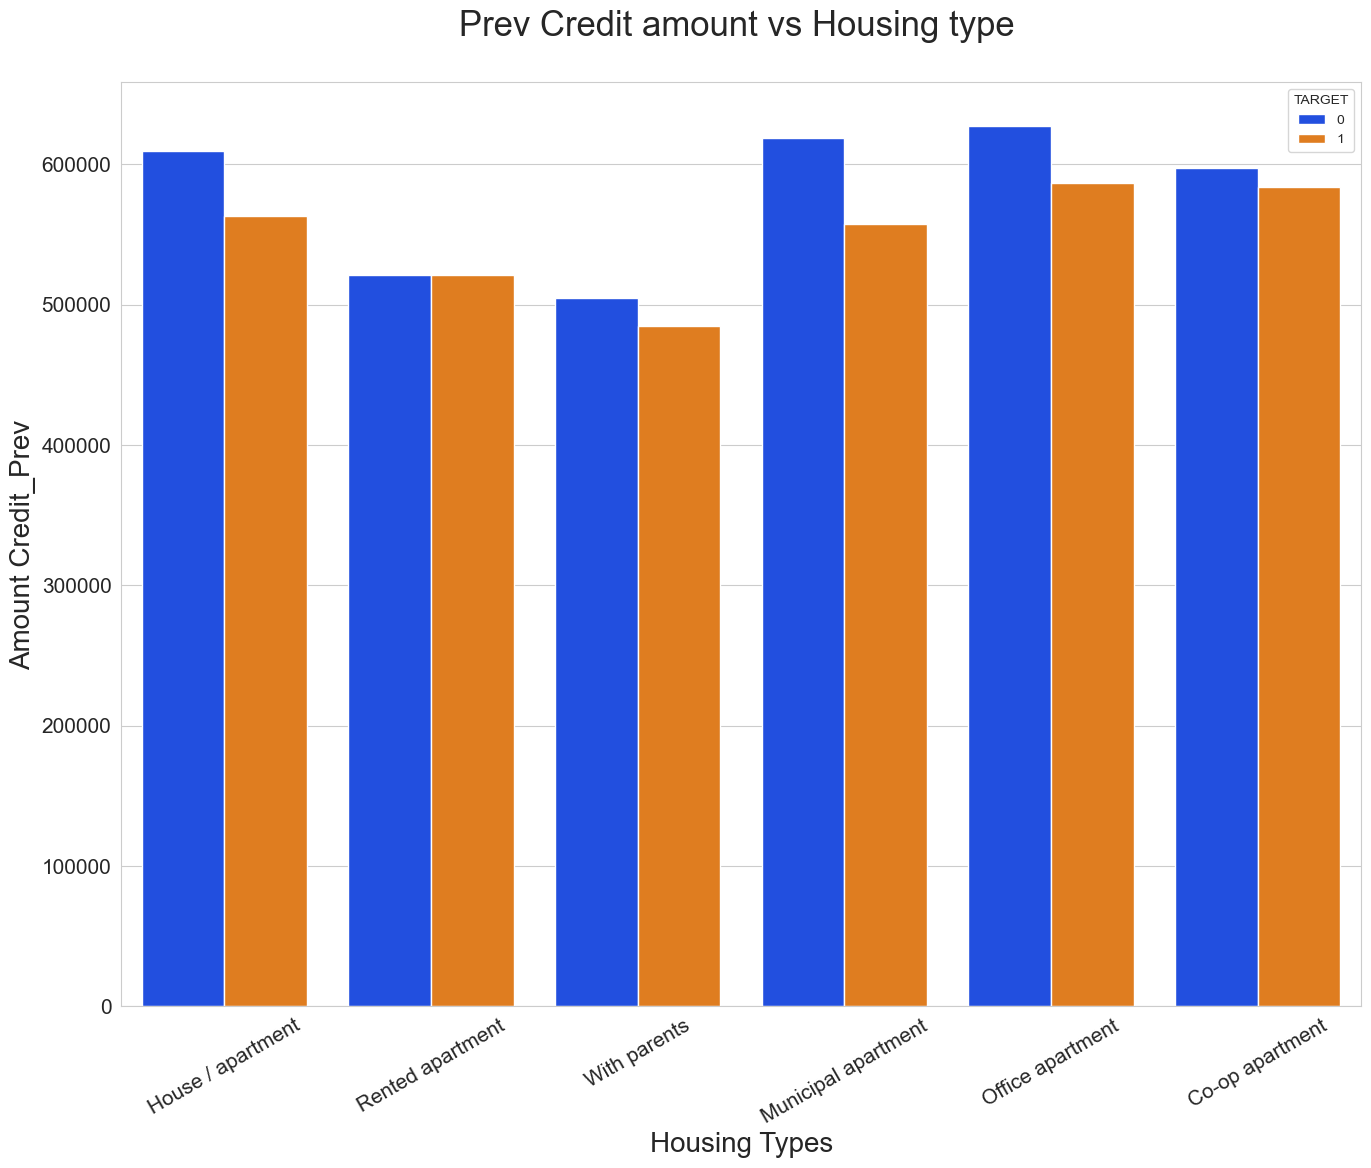

In [105]:
# Plotting for Credit amount prev vs Housing type,

plt.figure(figsize=(16,12))
plt.xticks(rotation=30)
sns.barplot(data =loan_merg, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE', palette='bright', ci = None)
plt.title('Prev Credit amount vs Housing type \n', fontsize=25)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Housing Types', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Conclusion of EDA Analysis

1] Banks should prioritize financing for Office Apartments and Co-Op Apartments since borrowers from these housing types exhibit better repayment behavior and are less likely to default.

2] Encourage loans for Renovations and Miscellaneous purposes, as these categories have consistently shown lower risk profiles, making them safer investments for the bank.

3] Focus on extending loans to Self-Employed individuals and businesses categorized under Entity Type-3, as their repayment patterns demonstrate reliability and financial discipline.

4] Consider working professionals, particularly female employees, as a primary target group for loans due to their consistent and dependable repayment histories.